In [1]:
!ls /datasets/salesdataset

'Online Sales Data.csv'


In [2]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt

#clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [5]:
sales = pd.read_csv("datasales/Online Sales Data.csv")
sales

Transaction ID        Date Product Category  \
0             10001  2024-01-01      Electronics   
1             10002  2024-01-02  Home Appliances   
2             10003  2024-01-03         Clothing   
3             10004  2024-01-04            Books   
4             10005  2024-01-05  Beauty Products   
..              ...         ...              ...   
235           10236  2024-08-23  Home Appliances   
236           10237  2024-08-24         Clothing   
237           10238  2024-08-25            Books   
238           10239  2024-08-26  Beauty Products   
239           10240  2024-08-27           Sports   

                                        Product Name  Units Sold  Unit Price  \
0                                      iPhone 14 Pro           2      999.99   
1                                   Dyson V11 Vacuum           1      499.99   
2                                   Levi's 501 Jeans           3       69.99   
3                                  The Da Vinci Code           4       15.99   
4                            Neutrogena Skincare Set           1       89.99   
..                                               ...         ...         ...   
235  Nespresso Vertuo Next Coffee and Espresso Maker           1      159.99   
236                        Nike Air Force 1 Sneakers           3       90.00   
237           The Handmaid's Tale by Margaret Atwood           3       10.99   
238             Sunday Riley Luna Sleeping Night Oil           1       55.00   
239                       Yeti Rambler 20 oz Tumbler           2       29.99   

     Total Revenue         Region Payment Method  
0          1999.98  North America    Credit Card  
1           499.99         Europe         PayPal  
2           209.97           Asia     Debit Card  
3            63.96  North America    Credit Card  
4            89.99         Europe         PayPal  
..             ...            ...            ...  
235         159.99         Europe         PayPal  
236         270.00           Asia     Debit Card  
237          32.97  North America    Credit Card  
238          55.00         Europe         PayPal  
239          59.98           Asia    Credit Card  

[240 rows x 9 columns]

In [6]:
sales.columns

Index(['Transaction ID', 'Date', 'Product Category', 'Product Name',
       'Units Sold', 'Unit Price', 'Total Revenue', 'Region',
       'Payment Method'],
      dtype='object')

In [7]:
# Check for duplicate rows
duplicates = sales.duplicated()

# Print the number of duplicates
print("Number of duplicates:", duplicates.sum())

# Print the duplicated rows
print("Duplicated rows:\n", sales[duplicates])

Number of duplicates: 0
Duplicated rows:
 Empty DataFrame
Columns: [Transaction ID, Date, Product Category, Product Name, Units Sold, Unit Price, Total Revenue, Region, Payment Method]
Index: []


In [8]:
## check isna

# Check for duplicate rows
isna = sales.isna()

# Print the number of duplicates
print("Number of isna:", isna.sum())

# Print the duplicated rows
print("Duplicated rows:\n", sales[isna])

Number of isna: Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64
Duplicated rows:
      Transaction ID Date Product Category Product Name  Units Sold  \
0               NaN  NaN              NaN          NaN         NaN   
1               NaN  NaN              NaN          NaN         NaN   
2               NaN  NaN              NaN          NaN         NaN   
3               NaN  NaN              NaN          NaN         NaN   
4               NaN  NaN              NaN          NaN         NaN   
..              ...  ...              ...          ...         ...   
235             NaN  NaN              NaN          NaN         NaN   
236             NaN  NaN              NaN          NaN         NaN   
237             NaN  NaN              NaN          NaN         NaN   
238             NaN  NaN              NaN          NaN 

In [9]:
# Check Data Outlier
numeric_cols = sales.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    q1 = sales[col].quantile(0.25)
    q3 = sales[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = sales[(sales[col] < lower_bound) | (sales[col] > upper_bound)]
    if not outliers.empty:
        print(f"Outliers in column '{col}':")
        print(outliers[[col]])

Outliers in column 'Units Sold':
    Units Sold
62          10
Outliers in column 'Unit Price':
     Unit Price
0        999.99
6       2499.99
7        599.99
12       749.99
35      1895.00
37       799.99
66      1199.99
72      1599.99
73       899.99
85      1299.99
95       999.99
102     3899.99
120      599.99
132     1299.99
138     1499.99
156      899.99
162     1199.99
168      699.99
173      699.99
180      649.99
210      749.99
216     2399.00
221      599.99
229      599.00
Outliers in column 'Total Revenue':
     Total Revenue
0          1999.98
6          2499.99
7          1199.98
12         1499.98
18          999.98
35         1895.00
36         1199.97
37         1599.98
42         1199.97
66         1199.99
72         1599.99
85         2599.98
95          999.99
102        3899.99
120        1199.98
132        1299.99
138        1499.99
162        1199.99
216        2399.00


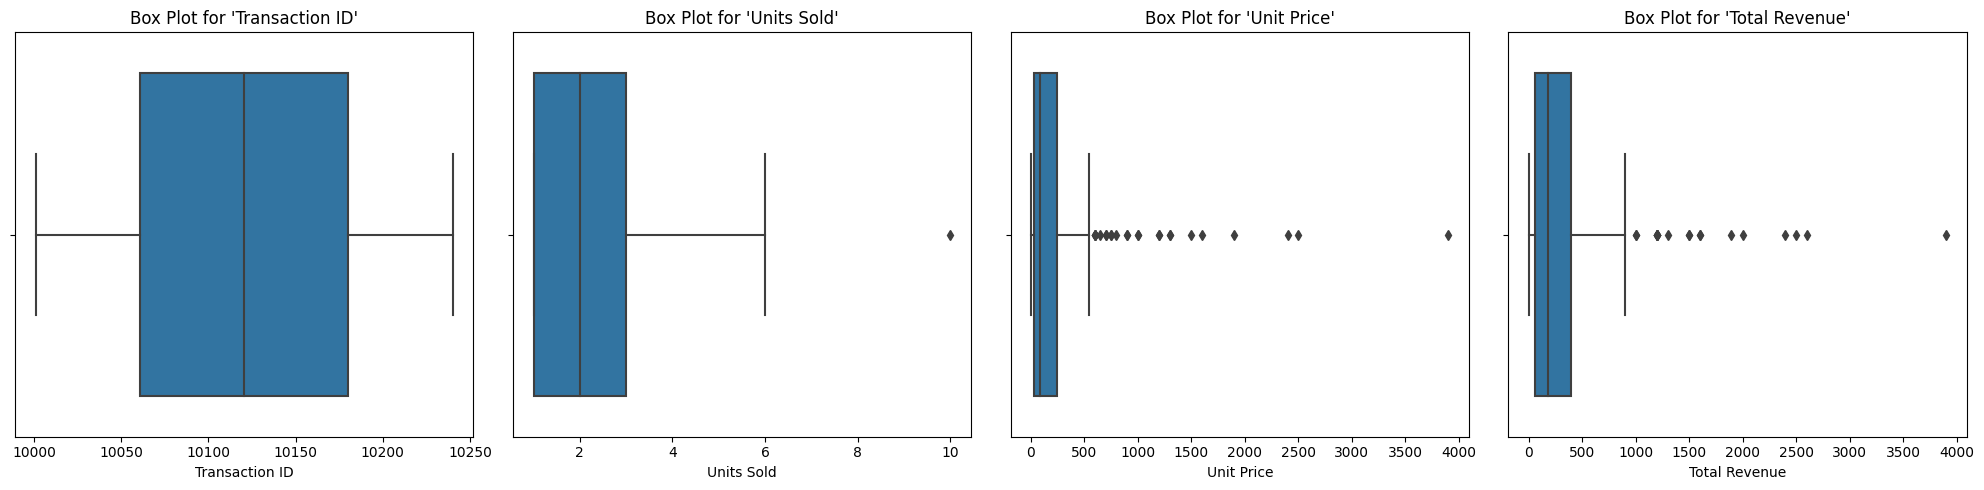

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

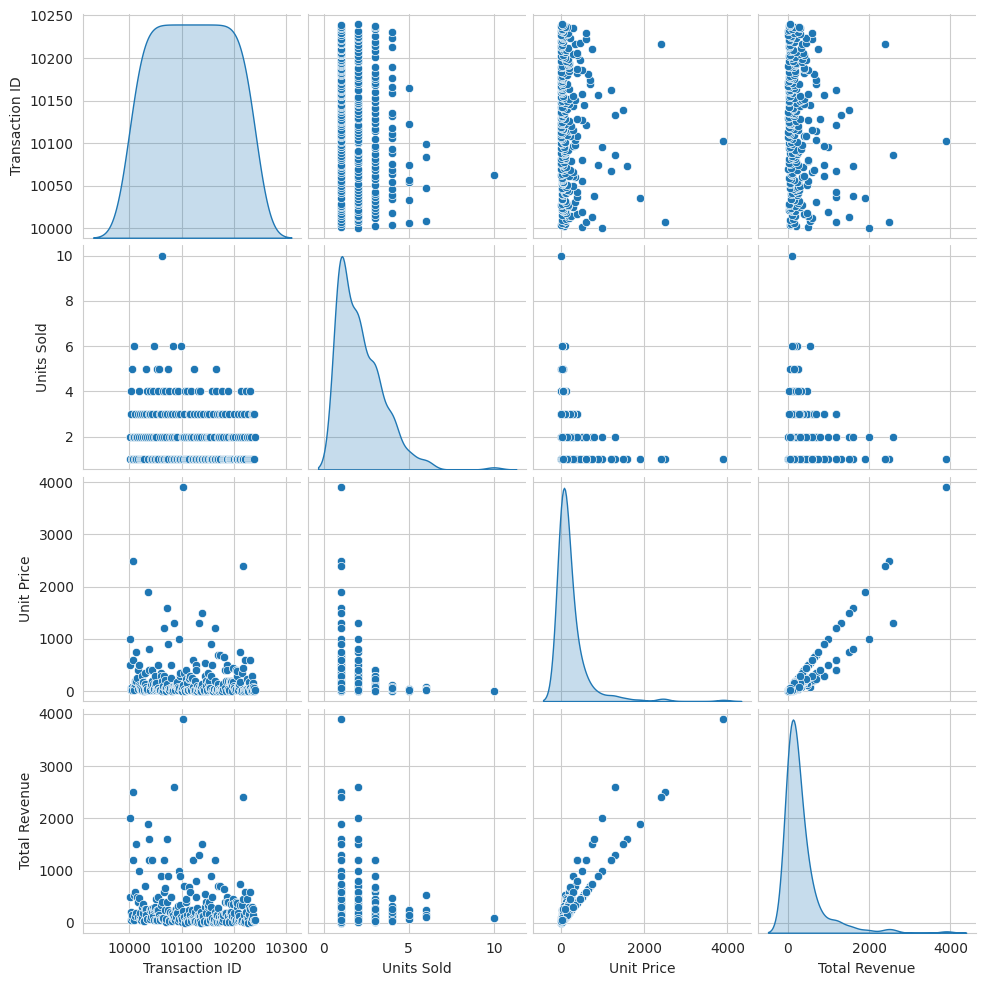

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a pandas DataFrame called 'sales'

# Box plots
numeric_cols = sales.select_dtypes(include=[np.number]).columns
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_cols), figsize=(20, 5))

for i, col in enumerate(numeric_cols):
    sns.boxplot(data=sales, x=sales[col], ax=axes[i])
    axes[i].set_title(f"Box Plot for '{col}'")

plt.tight_layout()
plt.show()

# Scatter plots
sns.set_style("whitegrid")
sns.pairplot(sales[numeric_cols], diag_kind="kde")
plt.show()

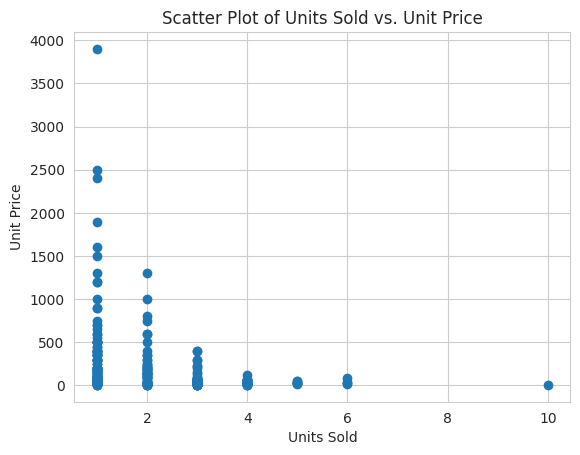

In [11]:
## Making Scatter plot
import matplotlib.pyplot as plt

# Assuming you have a pandas DataFrame called 'sales'
x = sales['Units Sold']
y = sales['Unit Price']

plt.scatter(x, y)
plt.xlabel('Units Sold')
plt.ylabel('Unit Price')
plt.title('Scatter Plot of Units Sold vs. Unit Price')
plt.show()

In [12]:
# Assuming you have a pandas DataFrame called 'sales'

# Define capping functions
def cap_outliers(data, col, cap_lower, cap_upper):
    capped_data = data.copy()
    capped_data.loc[capped_data[col] < cap_lower, col] = cap_lower
    capped_data.loc[capped_data[col] > cap_upper, col] = cap_upper
    return capped_data

# Identify potential outliers
q1_unit_price = sales['Unit Price'].quantile(0.25)
q3_unit_price = sales['Unit Price'].quantile(0.75)
iqr_unit_price = q3_unit_price - q1_unit_price
lower_bound_unit_price = q1_unit_price - 1.5 * iqr_unit_price
upper_bound_unit_price = q3_unit_price + 1.5 * iqr_unit_price

q1_total_revenue = sales['Total Revenue'].quantile(0.25)
q3_total_revenue = sales['Total Revenue'].quantile(0.75)
iqr_total_revenue = q3_total_revenue - q1_total_revenue
lower_bound_total_revenue = q1_total_revenue - 1.5 * iqr_total_revenue
upper_bound_total_revenue = q3_total_revenue + 1.5 * iqr_total_revenue

# Cap the outliers
capped_sales = sales.copy()
capped_sales = cap_outliers(capped_sales, 'Unit Price', lower_bound_unit_price, upper_bound_unit_price)
capped_sales = cap_outliers(capped_sales, 'Total Revenue', lower_bound_total_revenue, upper_bound_total_revenue)

# Print the capped data
print(capped_sales[['Unit Price', 'Total Revenue']])

     Unit Price  Total Revenue
0       580.725        903.615
1       499.990        499.990
2        69.990        209.970
3        15.990         63.960
4        89.990         89.990
..          ...            ...
235     159.990        159.990
236      90.000        270.000
237      10.990         32.970
238      55.000         55.000
239      29.990         59.980

[240 rows x 2 columns]


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


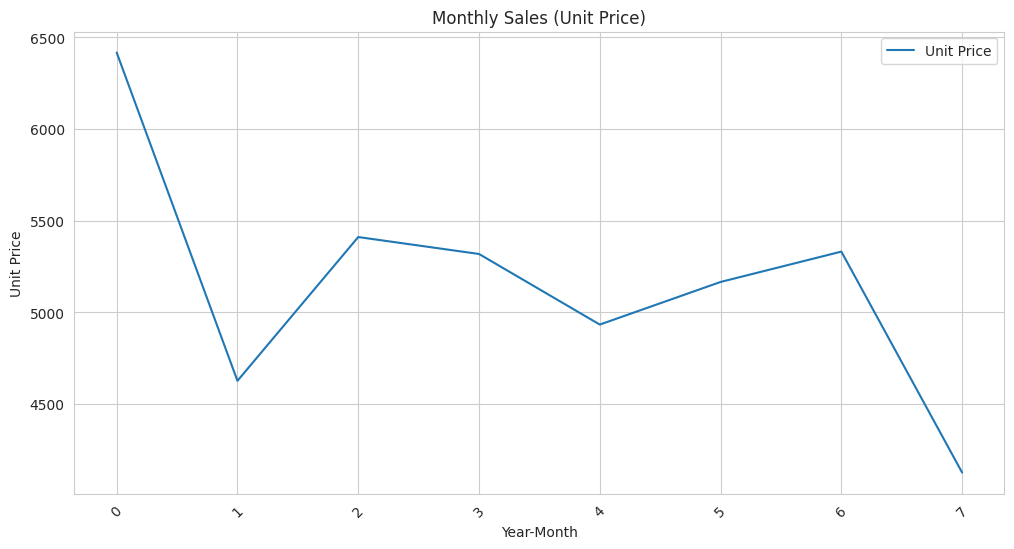

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


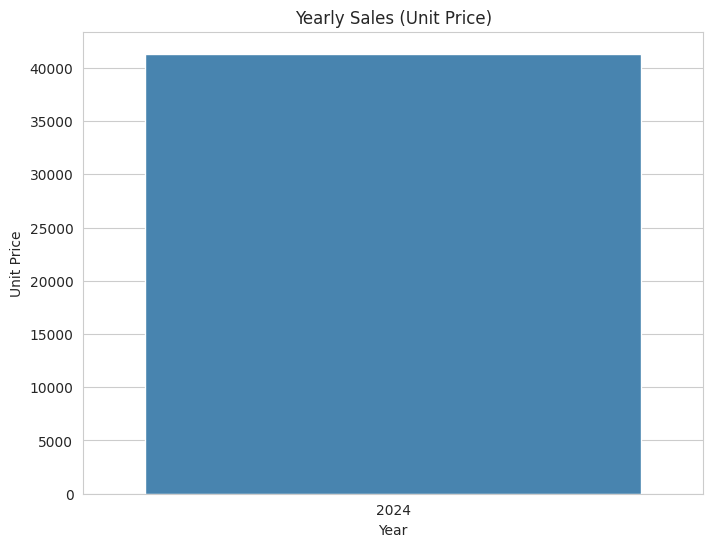

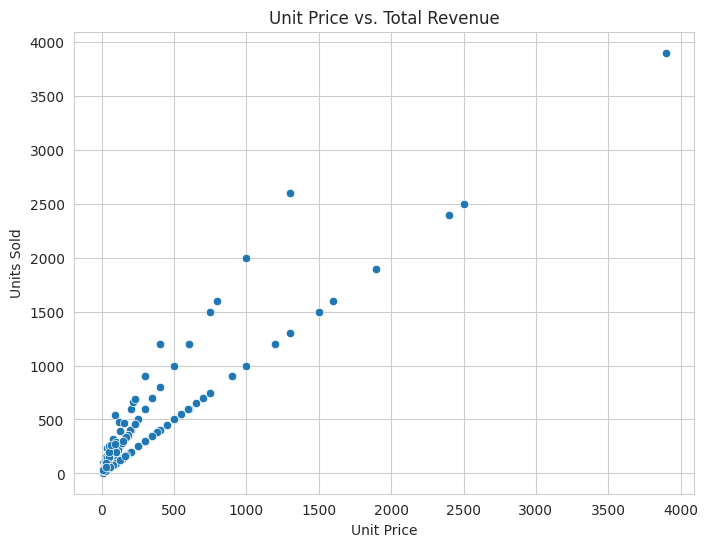

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a pandas DataFrame called 'sales'

# Convert the 'Date' column to datetime format
capped_sales['Date'] = pd.to_datetime(capped_sales['Date'])

# Extract year, month, and day from the 'Date' column
capped_sales['Year'] = capped_sales['Date'].dt.year
capped_sales['Month'] = capped_sales['Date'].dt.month
capped_sales['Day'] = capped_sales['Date'].dt.day

# Aggregate data by month and year
monthly_sales = capped_sales.groupby([capped_sales['Year'], capped_sales['Month']])[['Unit Price', 'Total Revenue']].sum().reset_index()
yearly_sales = capped_sales.groupby(capped_sales['Year'])[['Unit Price', 'Total Revenue']].sum().reset_index()

# Plot monthly sales
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x=monthly_sales.index, y='Unit Price', label='Unit Price')
plt.xticks(rotation=45)
plt.title('Monthly Sales (Unit Price)')
plt.xlabel('Year-Month')
plt.ylabel('Unit Price')
plt.show()

# Plot yearly sales
plt.figure(figsize=(8, 6))
sns.barplot(data=yearly_sales, x='Year', y='Unit Price', palette='Blues_d')
plt.title('Yearly Sales (Unit Price)')
plt.xlabel('Year')
plt.ylabel('Unit Price')
plt.show()

# Scatter plot of Unit Price vs. Units Sold
plt.figure(figsize=(8, 6))
sns.scatterplot(data=sales, x='Unit Price', y='Total Revenue')
plt.title('Unit Price vs. Total Revenue')
plt.xlabel('Unit Price')
plt.ylabel('Units Sold')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


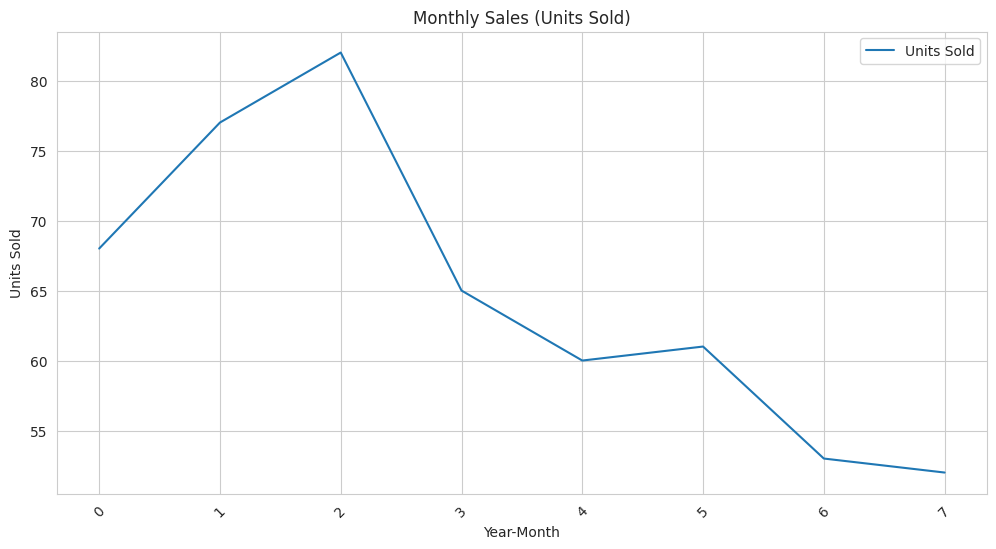

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


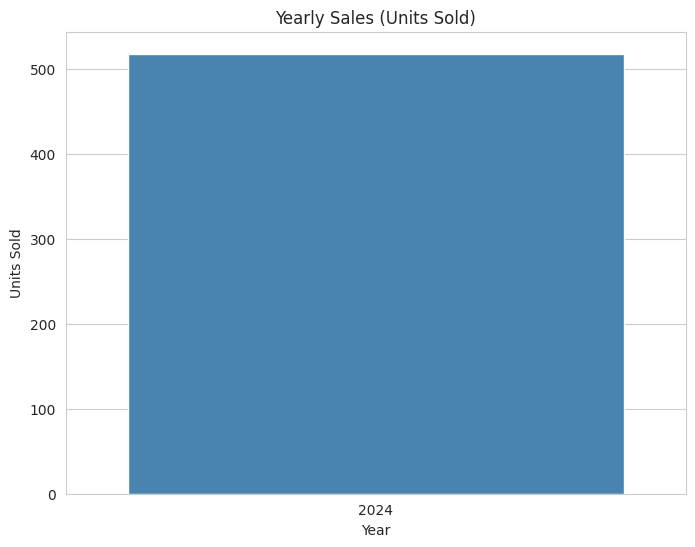

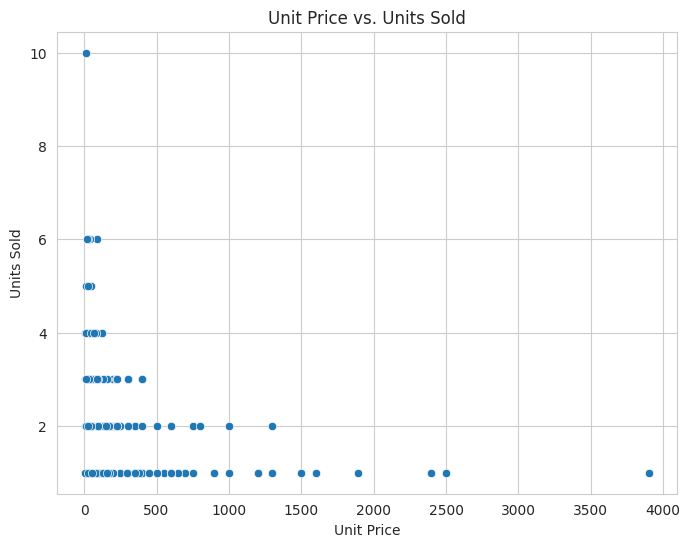

In [14]:
# Assuming you have a pandas DataFrame called 'sales'

# Convert the 'Date' column to datetime format
capped_sales['Date'] = pd.to_datetime(capped_sales['Date'])

# Extract year, month, and day from the 'Date' column
capped_sales['Year'] = capped_sales['Date'].dt.year
capped_sales['Month'] = capped_sales['Date'].dt.month
capped_sales['Day'] = capped_sales['Date'].dt.day

# Aggregate data by month and year
monthly_sales = capped_sales.groupby([capped_sales['Year'], capped_sales['Month']])[['Units Sold', 'Total Revenue']].sum().reset_index()
yearly_sales = capped_sales.groupby(capped_sales['Year'])[['Units Sold', 'Total Revenue']].sum().reset_index()

# Plot monthly sales
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x=monthly_sales.index, y='Units Sold', label='Units Sold')
plt.xticks(rotation=45)
plt.title('Monthly Sales (Units Sold)')
plt.xlabel('Year-Month')
plt.ylabel('Units Sold')
plt.show()

# Plot yearly sales
plt.figure(figsize=(8, 6))
sns.barplot(data=yearly_sales, x='Year', y='Units Sold', palette='Blues_d')
plt.title('Yearly Sales (Units Sold)')
plt.xlabel('Year')
plt.ylabel('Units Sold')
plt.show()

# Scatter plot of Unit Price vs. Units Sold
plt.figure(figsize=(8, 6))
sns.scatterplot(data=sales, x='Unit Price', y='Units Sold')
plt.title('Unit Price vs. Units Sold')
plt.xlabel('Unit Price')
plt.ylabel('Units Sold')
plt.show()

In [15]:
#CHECK REGION DATA
capped_sales.Region.unique()

array(['North America', 'Europe', 'Asia'], dtype=object)

In [16]:
# Convert the 'Date' column to datetime format
capped_sales['Date'] = pd.to_datetime(capped_sales['Date'])

# Aggregate data by region
region_sales = capped_sales.groupby('Region')[['Units Sold', 'Total Revenue']].sum().reset_index()

# Extract year, month, and day from the 'Date' column
capped_sales['Year'] = capped_sales['Date'].dt.year
capped_sales['Month'] = capped_sales['Date'].dt.month
capped_sales['Day'] = capped_sales['Date'].dt.day

# Aggregate data by month and year
monthly_sales = capped_sales.groupby([capped_sales['Year'], capped_sales['Month']])[['Units Sold', 'Total Revenue']].sum().reset_index()
yearly_sales = capped_sales.groupby(capped_sales['Year'])[['Units Sold', 'Total Revenue']].sum().reset_index()

# Define a dictionary to map regions to country codes (simplified example)
region_to_country = {
    'North America': 'USA',
    'Europe': 'FRA',
    'Asia': 'ASIA'
}

# Map the regions to country codes
region_sales['Country'] = region_sales['Region'].map(region_to_country)

# Plot the map
fig = px.choropleth(
    region_sales,
    locations='Country',
    locationmode='ISO-3',
    color='Total Revenue',
    hover_name='Region',
    hover_data={'Units Sold': True, 'Total Revenue': True, 'Country': False},
    title='Total Revenue by Region'
)
fig.update_geos(projection_type='natural earth')
fig.show()

In [17]:
# Convert the 'Date' column to datetime format
capped_sales['Date'] = pd.to_datetime(capped_sales['Date'])

# Extract year, month, and day from the 'Date' column
capped_sales['Year'] = capped_sales['Date'].dt.year
capped_sales['Month'] = capped_sales['Date'].dt.month
capped_sales['Day'] = capped_sales['Date'].dt.day

# Aggregate data by month and year
monthly_sales = capped_sales.groupby([capped_sales['Year'], capped_sales['Month']])[['Units Sold', 'Total Revenue']].sum().reset_index()
yearly_sales = capped_sales.groupby(capped_sales['Year'])[['Units Sold', 'Total Revenue']].sum().reset_index()

# Plot monthly sales
monthly_sales['Year-Month'] = monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str).str.zfill(2)
fig_monthly = px.line(monthly_sales, x='Year-Month', y='Units Sold', title='Monthly Sales (Units Sold)')
fig_monthly.update_layout(xaxis_title='Year-Month', yaxis_title='Units Sold', xaxis_tickangle=-45)
fig_monthly.show()

# Plot yearly sales
fig_yearly = px.bar(yearly_sales, x='Year', y='Units Sold', title='Yearly Sales (Units Sold)', color='Units Sold', color_continuous_scale='Blues')
fig_yearly.update_layout(xaxis_title='Year', yaxis_title='Units Sold')
fig_yearly.show()

# Scatter plot of Unit Price vs. Units Sold
fig_scatter = px.scatter(capped_sales, x='Unit Price', y='Units Sold', size='Total Revenue', color='Total Revenue', title='Unit Price vs. Units Sold', color_continuous_scale='viridis')
fig_scatter.update_layout(xaxis_title='Unit Price', yaxis_title='Units Sold')
fig_scatter.show()

/tmp/ipykernel_1455/1129604778.py:16: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

/tmp/ipykernel_1455/1129604778.py:19: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Length of training data: 2
Root Mean Squared Error (RMSE): 7851.35


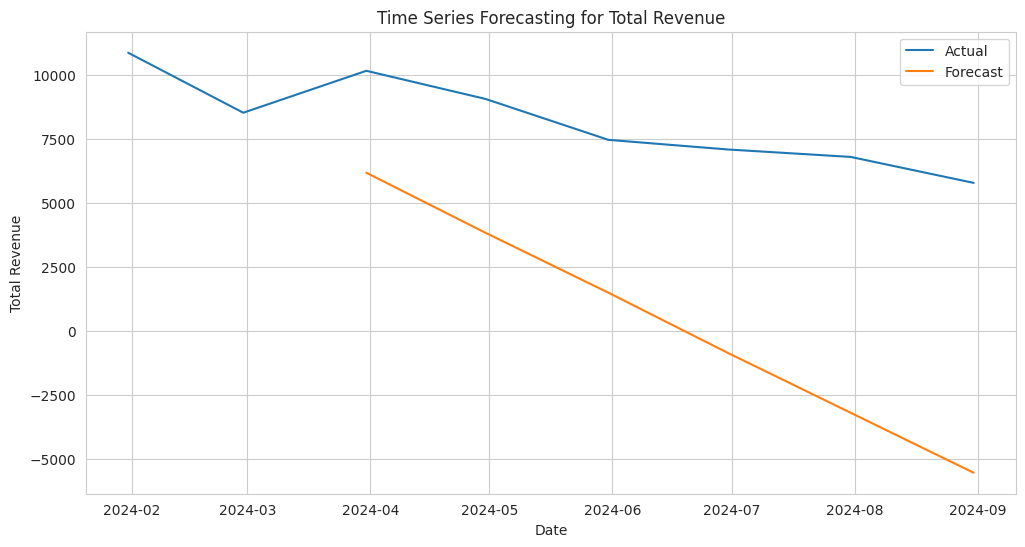

In [18]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Assuming you have a pandas DataFrame called 'capped_sales'
# Ensure the Date column is in datetime format
capped_sales['Date'] = pd.to_datetime(capped_sales['Date'])

# Set the 'Date' column as the index
capped_sales = capped_sales.set_index('Date')

# Resample the data to a desired frequency (e.g., monthly)
resampled_data = capped_sales['Total Revenue'].resample('M').sum()

# Handle missing values if any
resampled_data = resampled_data.fillna(method='ffill')

# Split the data into train and test sets
train_data = resampled_data[:-6]  # Use the last 6 data points for testing
test_data = resampled_data[-6:]

# Check the length of the training data
print(f"Length of training data: {len(train_data)}")

# Fit the Exponential Smoothing model without seasonal component
model = ExponentialSmoothing(train_data, trend='add', seasonal=None)
fitted_model = model.fit()

# Make predictions for the test data
predictions = fitted_model.forecast(len(test_data))

# Evaluate the model
rmse = sqrt(mean_squared_error(test_data, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Visualize the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(resampled_data, label='Actual')
plt.plot(predictions, label='Forecast')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.title('Time Series Forecasting for Total Revenue')
plt.show()

In [19]:
capped_sales.columns

Index(['Transaction ID', 'Product Category', 'Product Name', 'Units Sold',
       'Unit Price', 'Total Revenue', 'Region', 'Payment Method', 'Year',
       'Month', 'Day'],
      dtype='object')

/tmp/ipykernel_1455/3239924416.py:16: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

/tmp/ipykernel_1455/3239924416.py:19: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Length of training data: 2
Root Mean Squared Error (RMSE): 7238.74


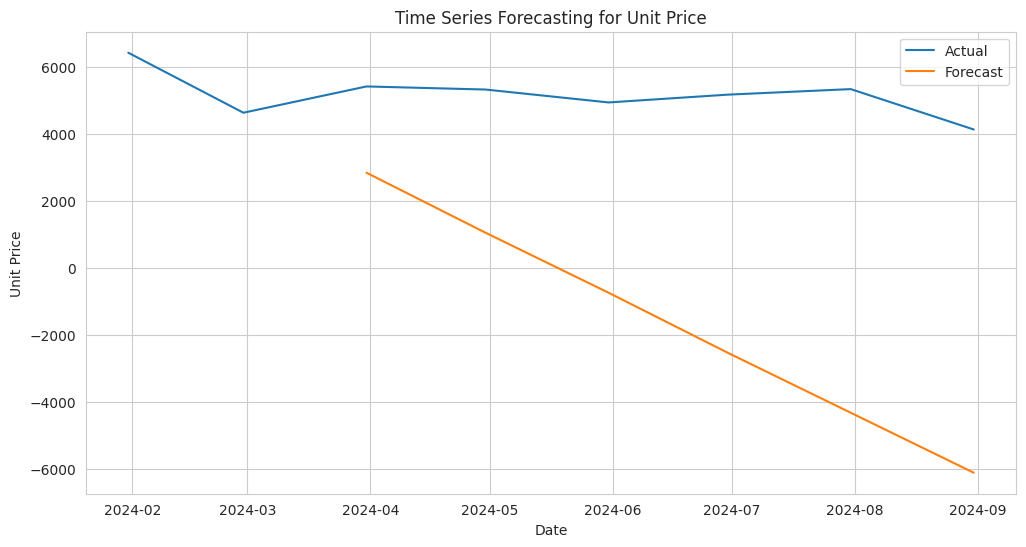

In [20]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Convert the 'Year', 'Month', and 'Day' columns to datetime format
capped_sales['Date'] = pd.to_datetime(capped_sales[['Year', 'Month', 'Day']])

# Aggregate data by month and year
monthly_sales = capped_sales.groupby(['Year', 'Month'])[['Unit Price', 'Total Revenue']].sum().reset_index()
monthly_sales['Year-Month'] = monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str).str.zfill(2)

# Resample the data to a desired frequency (e.g., monthly)
resampled_data = capped_sales['Unit Price'].resample('M').sum()

# Handle missing values if any
resampled_data = resampled_data.fillna(method='ffill')

# Split the data into train and test sets
train_data = resampled_data[:-6]
test_data = resampled_data[-6:]

# Check the length of the training data
print(f"Length of training data: {len(train_data)}")

# Fit the Exponential Smoothing model without seasonal component
model = ExponentialSmoothing(train_data, trend='add', seasonal=None)
fitted_model = model.fit()

# Make predictions for the test data
predictions = fitted_model.forecast(len(test_data))

# Evaluate the model
rmse = sqrt(mean_squared_error(test_data, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Visualize the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(resampled_data, label='Actual')
plt.plot(predictions, label='Forecast')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Unit Price')
plt.title('Time Series Forecasting for Unit Price')
plt.show()

Length of training data: 2
Root Mean Squared Error (RMSE): 52.53


/tmp/ipykernel_1455/1266783138.py:20: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

/tmp/ipykernel_1455/1266783138.py:23: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



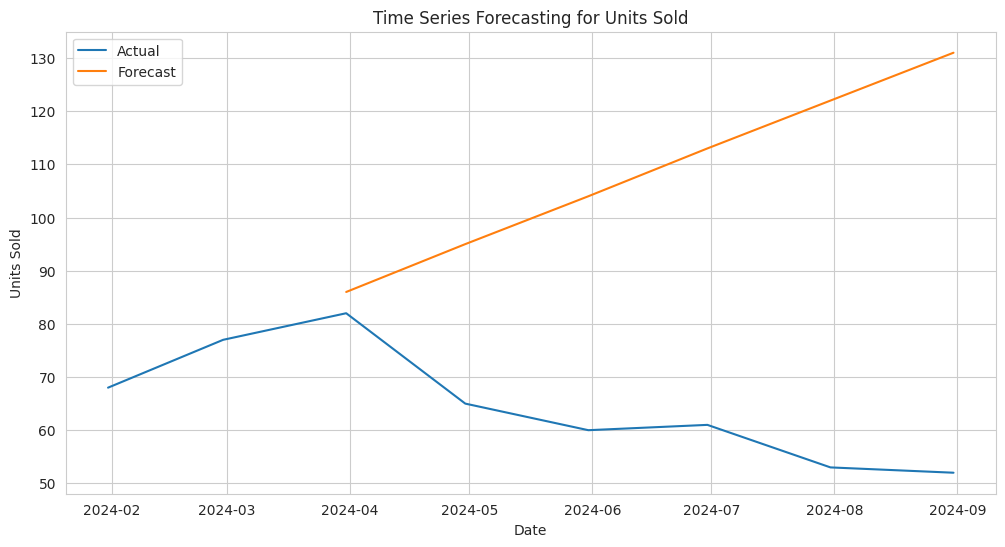

In [30]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Specify n_init explicitly
kmeans = KMeans(n_clusters=5, n_init=10)  # You can set n_init to any value you prefer

# Convert the 'Year', 'Month', and 'Day' columns to datetime format
capped_sales['Date'] = pd.to_datetime(capped_sales[['Year', 'Month', 'Day']])

# Aggregate data by month and year
monthly_sales = capped_sales.groupby(['Year', 'Month'])[['Units Sold', 'Total Revenue']].sum().reset_index()
monthly_sales['Year-Month'] = monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str).str.zfill(2)

# Resample the data to a desired frequency (e.g., monthly)
resampled_data = capped_sales['Units Sold'].resample('M').sum()

# Handle missing values if any
resampled_data = resampled_data.fillna(method='ffill')

# Split the data into train and test sets
train_data = resampled_data[:-6]
test_data = resampled_data[-6:]

# Check the length of the training data
print(f"Length of training data: {len(train_data)}")

# Fit the Exponential Smoothing model without seasonal component
model = ExponentialSmoothing(train_data, trend='add', seasonal=None)
fitted_model = model.fit()

# Make predictions for the test data
predictions = fitted_model.forecast(len(test_data))

# Evaluate the model
rmse = sqrt(mean_squared_error(test_data, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Visualize the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(resampled_data, label='Actual')
plt.plot(predictions, label='Forecast')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.title('Time Series Forecasting for Units Sold')
plt.show()

In [22]:
# Clustering

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will 

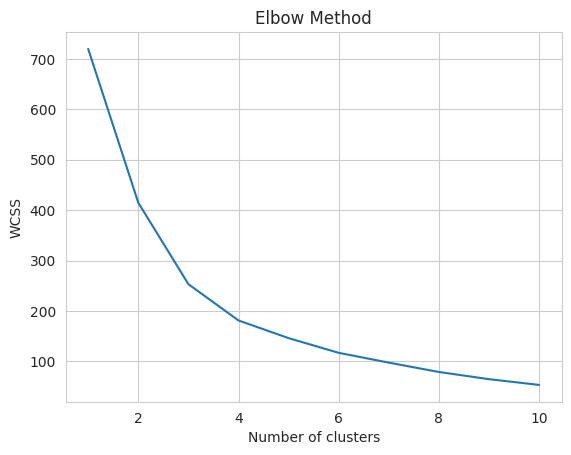

         Units Sold   Unit Price  Total Revenue
Cluster                                        
0          3.746667    47.393200     167.296000
1          1.607143   746.347857    1037.413214
2          1.200000  2398.794000    2658.792000
3          1.409091   153.702576     194.538788


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [42]:
from sklearn.cluster import KMeans

# Specify n_init explicitly
kmeans = KMeans(n_clusters=5, n_init=10)  # You can set n_init to any value you prefer

# Select relevant features for clustering
features = ['Units Sold', 'Unit Price', 'Total Revenue']

# Create a new DataFrame with the selected features
X = sales[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters (e.g., using the Elbow method)
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

import matplotlib.pyplot as plt
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the Elbow method, choose the optimal number of clusters
n_clusters = 4  # Adjust this value based on your analysis

# Perform K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original DataFrame
sales['Cluster'] = clusters

# Analyze the clusters
print(sales.groupby('Cluster')[features].mean())

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will 

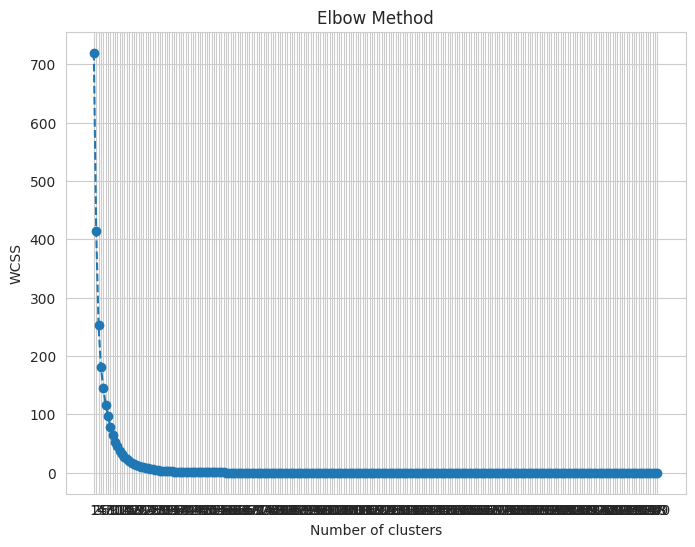

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



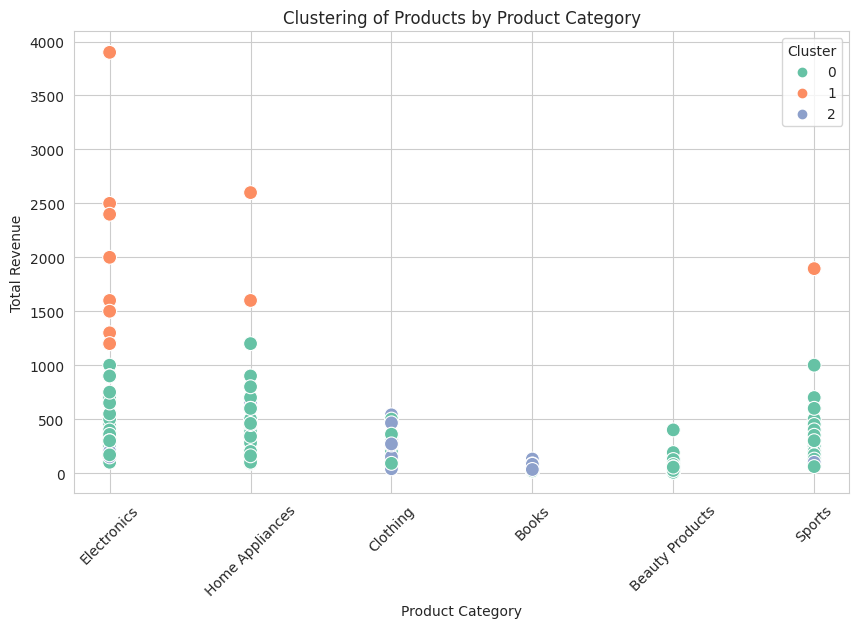

         Units Sold   Unit Price  Total Revenue
Cluster                                        
0          1.405405   205.652703     260.992703
1          1.307692  1641.837692    1937.988462
2          3.708861    62.714557     211.988354


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
features = ['Units Sold', 'Unit Price', 'Total Revenue']

# Create a new DataFrame with the selected features
X = sales[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters (e.g., using the Elbow method)
wcss = []
for i in range(1, len(X) + 1):  # Iterate up to the number of samples
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(X) + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, len(X) + 1))
plt.grid(True)
plt.show()

# Based on the Elbow method, choose the optimal number of clusters
n_clusters = 3  # Adjust this value based on your analysis

# Perform K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original DataFrame
sales['Cluster'] = clusters

# Scatter plot of clusters based on 'Product Category'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sales, x='Product Category', y='Total Revenue', hue='Cluster', palette='Set2', s=100)
plt.title('Clustering of Products by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.legend(title='Cluster')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Summary of clusters
cluster_summary = sales.groupby('Cluster')[features].mean()
print(cluster_summary)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will 

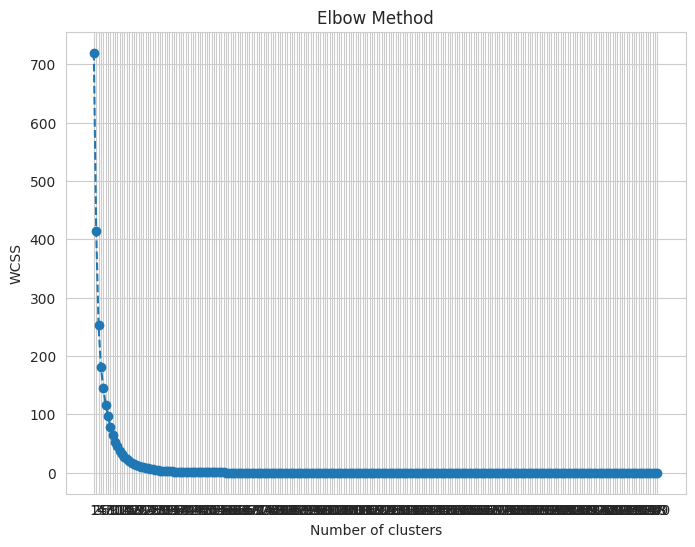

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



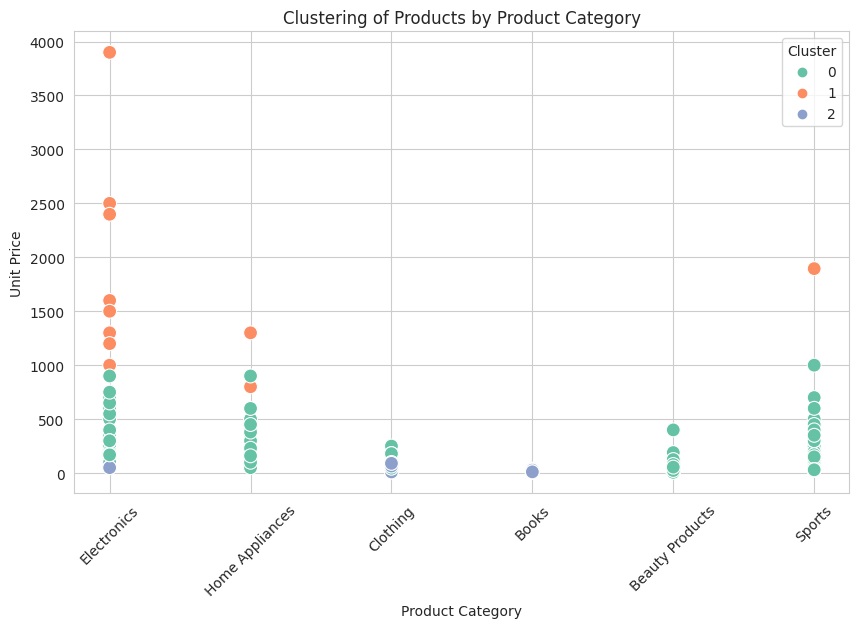

         Units Sold   Unit Price  Total Revenue
Cluster                                        
0          1.405405   205.652703     260.992703
1          1.307692  1641.837692    1937.988462
2          3.708861    62.714557     211.988354


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
features = ['Units Sold', 'Unit Price', 'Total Revenue']

# Create a new DataFrame with the selected features
X = sales[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters (e.g., using the Elbow method)
wcss = []
for i in range(1, len(X) + 1):  # Iterate up to the number of samples
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(X) + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, len(X) + 1))
plt.grid(True)
plt.show()

# Based on the Elbow method, choose the optimal number of clusters
n_clusters = 3  # Adjust this value based on your analysis

# Perform K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original DataFrame
sales['Cluster'] = clusters

# Scatter plot of clusters based on 'Product Category'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sales, x='Product Category', y='Unit Price', hue='Cluster', palette='Set2', s=100)
plt.title('Clustering of Products by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Unit Price')
plt.legend(title='Cluster')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Summary of clusters
cluster_summary = sales.groupby('Cluster')[features].mean()
print(cluster_summary)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will 

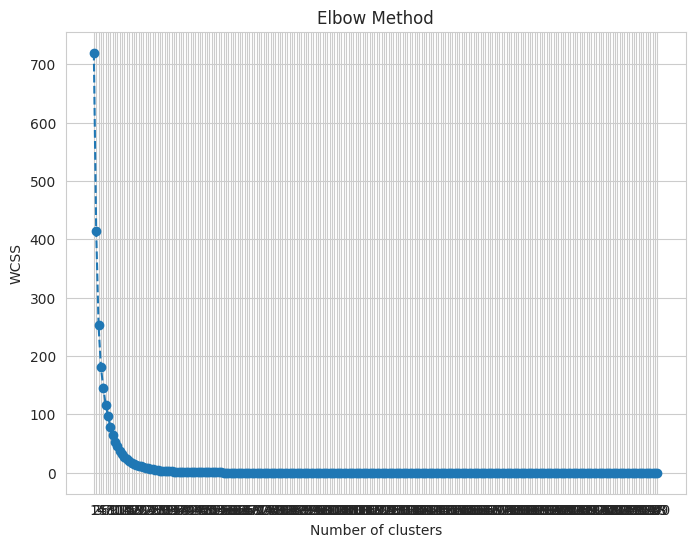

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



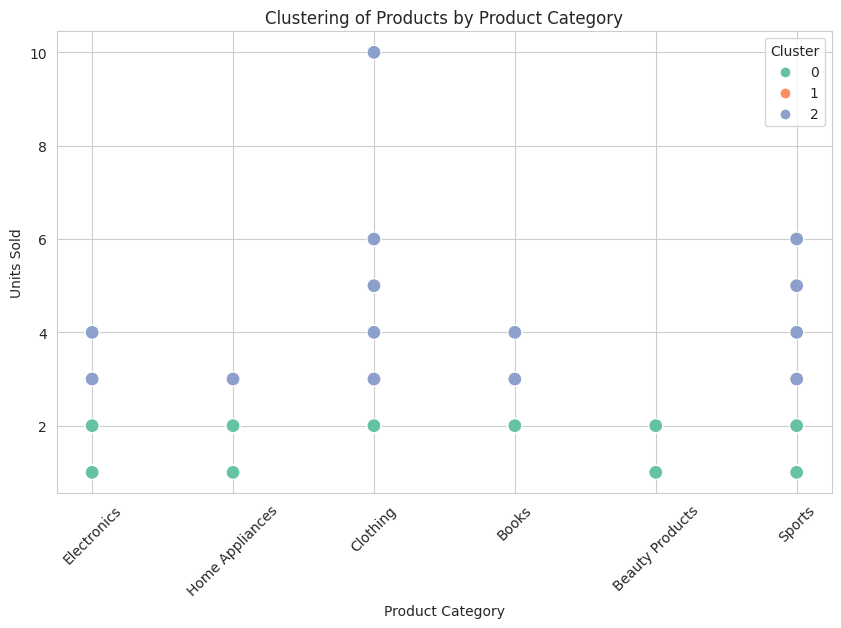

          Unit Price  Total Revenue  Units Sold
Cluster                                        
0         205.652703     260.992703    1.405405
1        1641.837692    1937.988462    1.307692
2          62.714557     211.988354    3.708861


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

# Specify n_init explicitly
kmeans = KMeans(n_clusters=5, n_init=10)  # You can set n_init to any value you prefer

# Select relevant features for clustering
features = ['Unit Price','Total Revenue','Units Sold']

# Create a new DataFrame with the selected features
X = sales[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters (e.g., using the Elbow method)
wcss = []
for i in range(1, len(X) + 1):  # Iterate up to the number of samples
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(X) + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, len(X) + 1))
plt.grid(True)
plt.show()

# Based on the Elbow method, choose the optimal number of clusters
n_clusters = 3  # Adjust this value based on your analysis

# Perform K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original DataFrame
sales['Cluster'] = clusters

# Scatter plot of clusters based on 'Product Category'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sales, x='Product Category', y='Units Sold', hue='Cluster', palette='Set2', s=100)
plt.title('Clustering of Products by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Units Sold')
plt.legend(title='Cluster')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Summary of clusters
cluster_summary = sales.groupby('Cluster')[features].mean()
print(cluster_summary)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: ConvergenceWarning:

Number of distinct clusters (162) found smaller than n_clusters (163). Possibly due to duplicate points in X.

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: ConvergenceWarning:

Number of distinct clusters (162) found smaller than n_clusters (164). Possibly due to duplicate points in X.

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: ConvergenceWarning:

Number of distinct clusters (162) found smaller than n_clusters (165). Possibly due to duplicate points in X.

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: ConvergenceWarning:

Number of distinct clusters (162) found smaller than n_clusters (166). Possibly due to duplicate points in X.

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: ConvergenceWarning:

Number of distinct clusters (162) found smaller than n_clusters (167). Possibly due to duplicate points in X.

/usr/local/lib/python3.11/dist

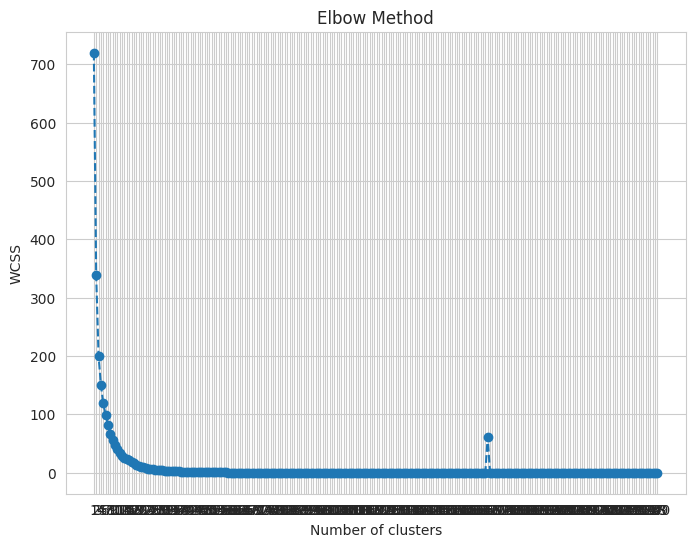

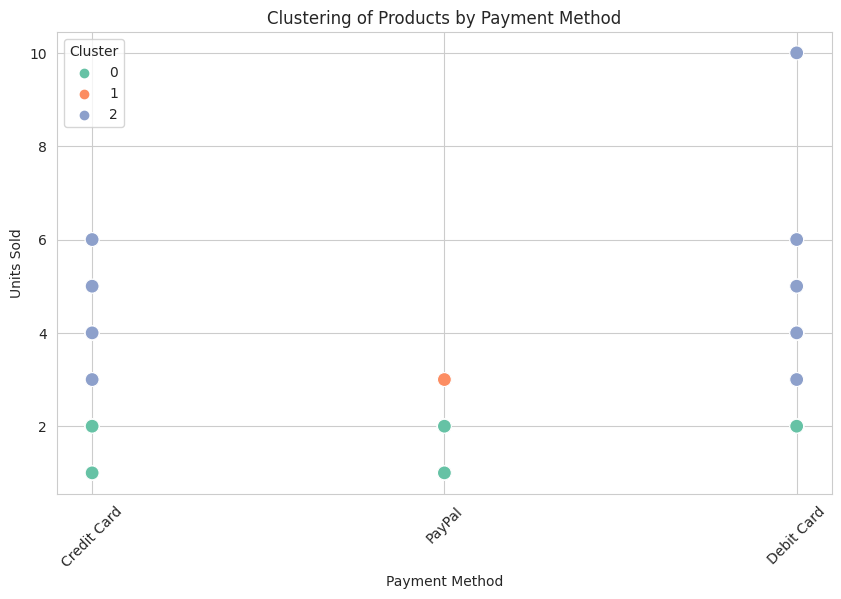

         Unit Price  Total Revenue  Units Sold
Cluster                                       
0        104.646000     143.650182    1.454545
1        464.033276     678.342845    1.482759
2         40.341111     147.186250    3.777778


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Specify n_init explicitly
kmeans = KMeans(n_clusters=5, n_init=10)  # You can set n_init to any value you prefer

# Select relevant features for clustering
features = ['Unit Price', 'Total Revenue', 'Units Sold']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(capped_sales[features])

# Determine the optimal number of clusters (e.g., using the Elbow method)
wcss = []
for i in range(1, len(capped_sales) + 1):  # Iterate up to the number of samples
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)  # Set n_init explicitly
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(capped_sales) + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, len(capped_sales) + 1))
plt.grid(True)
plt.show()

# Based on the Elbow method, choose the optimal number of clusters
n_clusters = 3  # Adjust this value based on your analysis

# Perform K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init=10)  # Set n_init explicitly
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original DataFrame
capped_sales['Cluster'] = clusters

# Scatter plot of clusters based on 'Payment Method'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=capped_sales, x='Payment Method', y='Units Sold', hue='Cluster', palette='Set2', s=100)
plt.title('Clustering of Products by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Units Sold')
plt.legend(title='Cluster')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Summary of clusters
cluster_summary = capped_sales.groupby('Cluster')[features].mean()
print(cluster_summary)


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: ConvergenceWarning:

Number of distinct clusters (162) found smaller than n_clusters (163). Possibly due to duplicate points in X.

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: ConvergenceWarning:

Number of distinct clusters (162) found smaller than n_clusters (164). Possibly due to duplicate points in X.

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: ConvergenceWarning:

Number of distinct clusters (162) found smaller than n_clusters (165). Possibly due to duplicate points in X.

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: ConvergenceWarning:

Number of distinct clusters (162) found smaller than n_clusters (166). Possibly due to duplicate points in X.

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: ConvergenceWarning:

Number of distinct clusters (162) found smaller than n_clusters (167). Possibly due to duplicate points in X.

/usr/local/lib/python3.11/dist

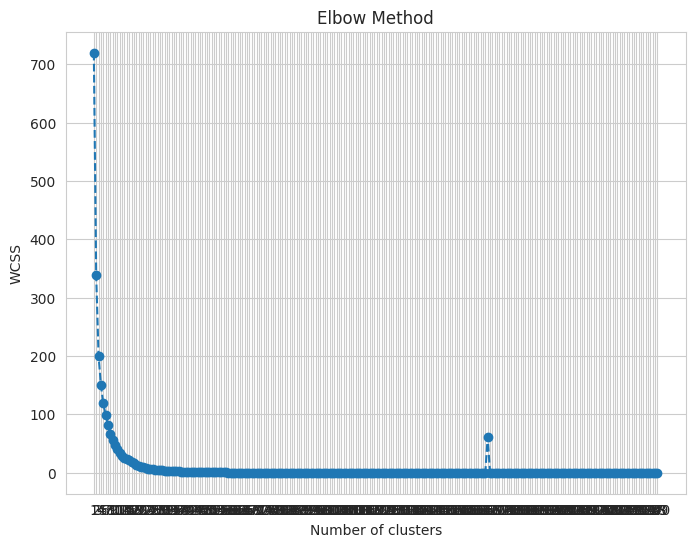

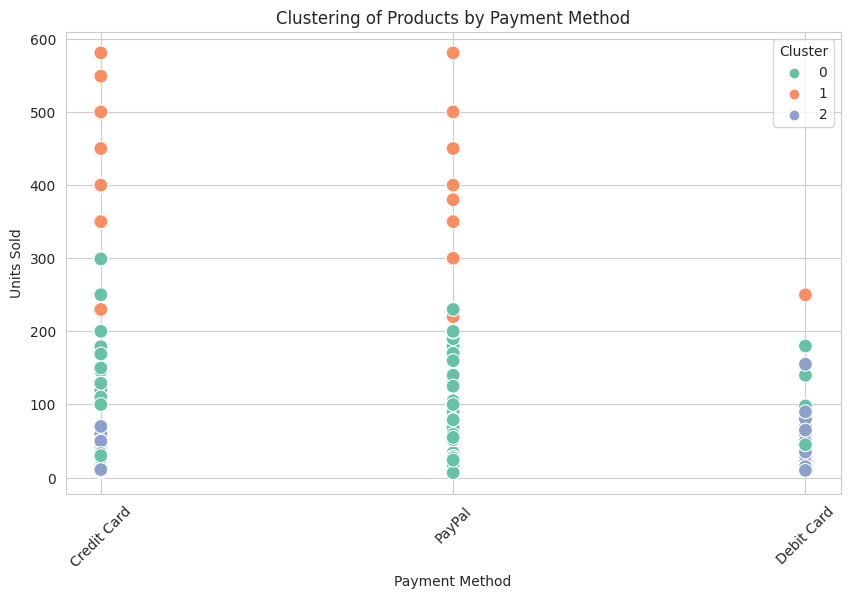

         Unit Price  Total Revenue  Units Sold
Cluster                                       
0        104.646000     143.650182    1.454545
1        464.033276     678.342845    1.482759
2         40.341111     147.186250    3.777778


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Specify n_init explicitly
kmeans = KMeans(n_clusters=5, n_init=10)  # You can set n_init to any value you prefer

# Select relevant features for clustering
features = ['Unit Price', 'Total Revenue', 'Units Sold']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(capped_sales[features])

# Determine the optimal number of clusters (e.g., using the Elbow method)
wcss = []
for i in range(1, len(capped_sales) + 1):  # Iterate up to the number of samples
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)  # Set n_init explicitly
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(capped_sales) + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, len(capped_sales) + 1))
plt.grid(True)
plt.show()

# Based on the Elbow method, choose the optimal number of clusters
n_clusters = 3  # Adjust this value based on your analysis

# Perform K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init=10)  # Set n_init explicitly
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original DataFrame
capped_sales['Cluster'] = clusters

# Scatter plot of clusters based on 'Payment Method'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=capped_sales, x='Payment Method', y='Unit Price', hue='Cluster', palette='Set2', s=100)
plt.title('Clustering of Products by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Units Sold')
plt.legend(title='Cluster')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Summary of clusters
cluster_summary = capped_sales.groupby('Cluster')[features].mean()
print(cluster_summary)


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: ConvergenceWarning:

Number of distinct clusters (162) found smaller than n_clusters (163). Possibly due to duplicate points in X.

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: ConvergenceWarning:

Number of distinct clusters (162) found smaller than n_clusters (164). Possibly due to duplicate points in X.

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: ConvergenceWarning:

Number of distinct clusters (162) found smaller than n_clusters (165). Possibly due to duplicate points in X.

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: ConvergenceWarning:

Number of distinct clusters (162) found smaller than n_clusters (166). Possibly due to duplicate points in X.

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: ConvergenceWarning:

Number of distinct clusters (162) found smaller than n_clusters (167). Possibly due to duplicate points in X.

/usr/local/lib/python3.11/dist

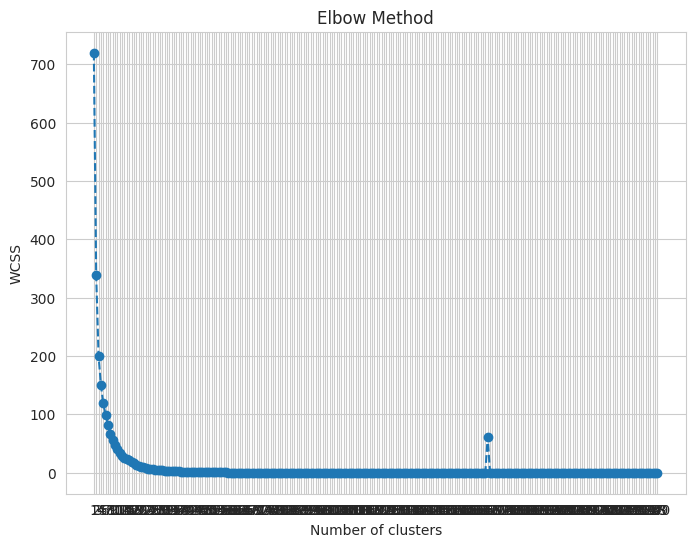

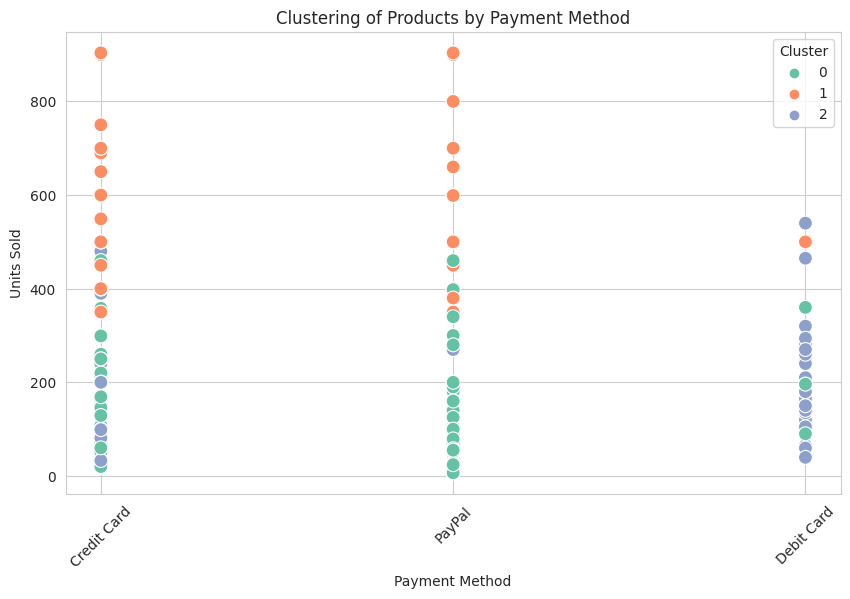

         Unit Price  Total Revenue  Units Sold
Cluster                                       
0        104.646000     143.650182    1.454545
1        464.033276     678.342845    1.482759
2         40.341111     147.186250    3.777778


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Specify n_init explicitly
kmeans = KMeans(n_clusters=5, n_init=10)  # You can set n_init to any value you prefer

# Select relevant features for clustering
features = ['Unit Price', 'Total Revenue', 'Units Sold']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(capped_sales[features])

# Determine the optimal number of clusters (e.g., using the Elbow method)
wcss = []
for i in range(1, len(capped_sales) + 1):  # Iterate up to the number of samples
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)  # Set n_init explicitly
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(capped_sales) + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, len(capped_sales) + 1))
plt.grid(True)
plt.show()

# Based on the Elbow method, choose the optimal number of clusters
n_clusters = 3  # Adjust this value based on your analysis

# Perform K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init=10)  # Set n_init explicitly
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original DataFrame
capped_sales['Cluster'] = clusters

# Scatter plot of clusters based on 'Payment Method'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=capped_sales, x='Payment Method', y='Total Revenue', hue='Cluster', palette='Set2', s=100)
plt.title('Clustering of Products by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Units Sold')
plt.legend(title='Cluster')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Summary of clusters
cluster_summary = capped_sales.groupby('Cluster')[features].mean()
print(cluster_summary)


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: ConvergenceWarning:

Number of distinct clusters (162) found smaller than n_clusters (163). Possibly due to duplicate points in X.

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: ConvergenceWarning:

Number of distinct clusters (162) found smaller than n_clusters (164). Possibly due to duplicate points in X.

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: ConvergenceWarning:

Number of distinct clusters (162) found smaller than n_clusters (165). Possibly due to duplicate points in X.

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: ConvergenceWarning:

Number of distinct clusters (162) found smaller than n_clusters (166). Possibly due to duplicate points in X.

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: ConvergenceWarning:

Number of distinct clusters (162) found smaller than n_clusters (167). Possibly due to duplicate points in X.

/usr/local/lib/python3.11/dist

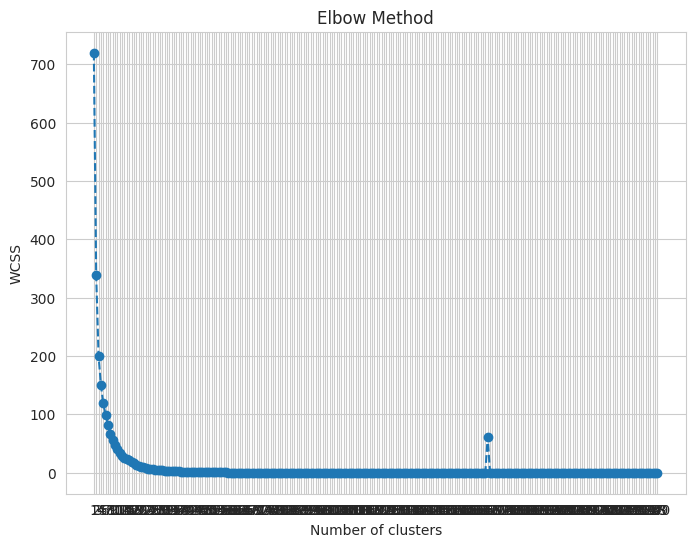

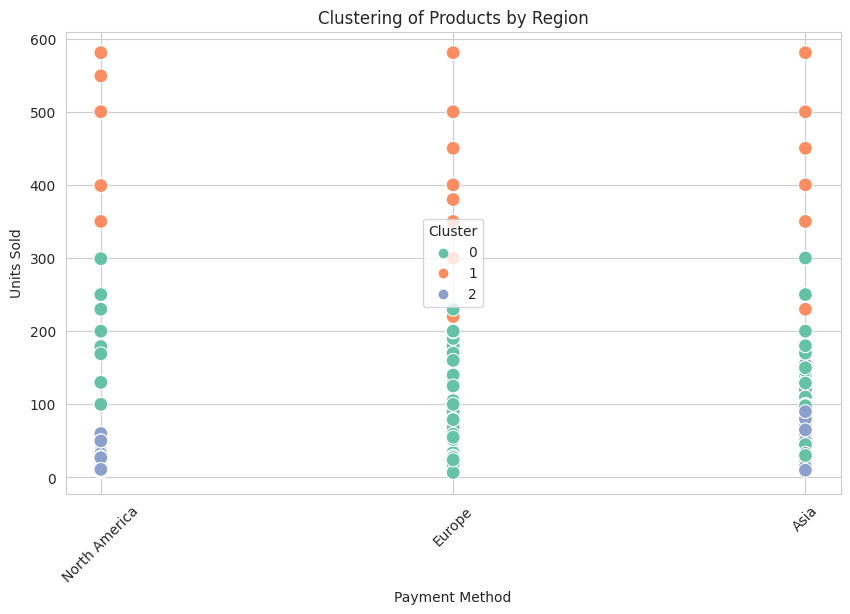

         Unit Price  Total Revenue  Units Sold
Cluster                                       
0        104.646000     143.650182    1.454545
1        464.033276     678.342845    1.482759
2         40.341111     147.186250    3.777778


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Specify n_init explicitly
kmeans = KMeans(n_clusters=5, n_init=10)  # You can set n_init to any value you prefer

# Select relevant features for clustering
features = ['Unit Price', 'Total Revenue', 'Units Sold']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(capped_sales[features])

# Determine the optimal number of clusters (e.g., using the Elbow method)
wcss = []
for i in range(1, len(capped_sales) + 1):  # Iterate up to the number of samples
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)  # Set n_init explicitly
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(capped_sales) + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, len(capped_sales) + 1))
plt.grid(True)
plt.show()

# Based on the Elbow method, choose the optimal number of clusters
n_clusters = 3  # Adjust this value based on your analysis

# Perform K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init=10)  # Set n_init explicitly
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original DataFrame
capped_sales['Cluster'] = clusters

# Scatter plot of clusters based on 'Payment Method'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=capped_sales, x='Region', y='Unit Price', hue='Cluster', palette='Set2', s=100)
plt.title('Clustering of Products by Region')
plt.xlabel('Payment Method')
plt.ylabel('Units Sold')
plt.legend(title='Cluster')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Summary of clusters
cluster_summary = capped_sales.groupby('Cluster')[features].mean()
print(cluster_summary)


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: ConvergenceWarning:

Number of distinct clusters (162) found smaller than n_clusters (163). Possibly due to duplicate points in X.

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: ConvergenceWarning:

Number of distinct clusters (162) found smaller than n_clusters (164). Possibly due to duplicate points in X.

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: ConvergenceWarning:

Number of distinct clusters (162) found smaller than n_clusters (165). Possibly due to duplicate points in X.

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: ConvergenceWarning:

Number of distinct clusters (162) found smaller than n_clusters (166). Possibly due to duplicate points in X.

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: ConvergenceWarning:

Number of distinct clusters (162) found smaller than n_clusters (167). Possibly due to duplicate points in X.

/usr/local/lib/python3.11/dist

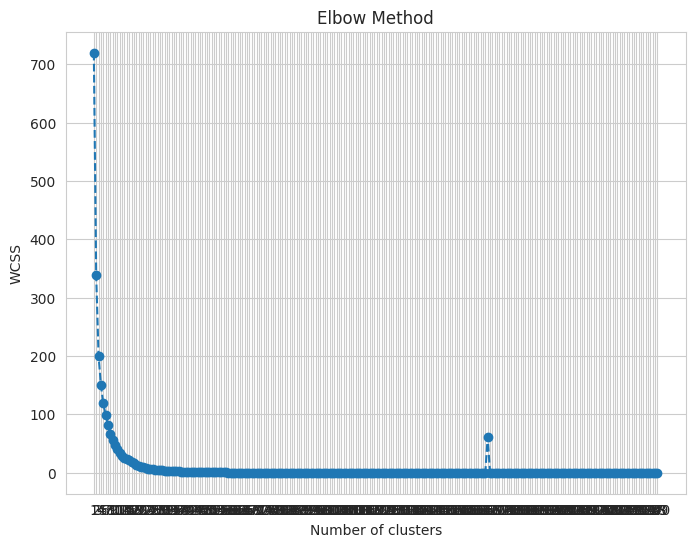

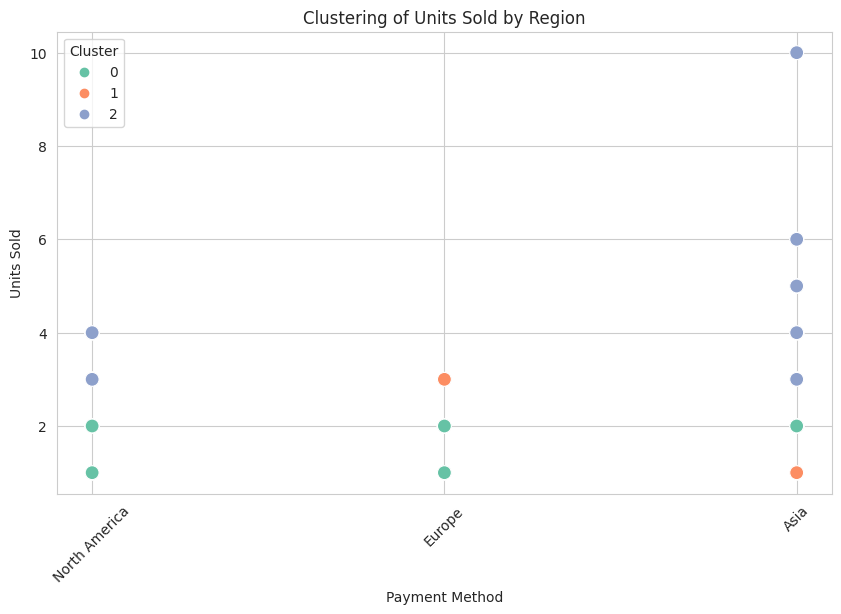

         Unit Price  Total Revenue  Units Sold
Cluster                                       
0        104.646000     143.650182    1.454545
1        464.033276     678.342845    1.482759
2         40.341111     147.186250    3.777778


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Specify n_init explicitly
kmeans = KMeans(n_clusters=5, n_init=10)  # You can set n_init to any value you prefer

# Select relevant features for clustering
features = ['Unit Price', 'Total Revenue', 'Units Sold']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(capped_sales[features])

# Determine the optimal number of clusters (e.g., using the Elbow method)
wcss = []
for i in range(1, len(capped_sales) + 1):  # Iterate up to the number of samples
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)  # Set n_init explicitly
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(capped_sales) + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, len(capped_sales) + 1))
plt.grid(True)
plt.show()

# Based on the Elbow method, choose the optimal number of clusters
n_clusters = 3  # Adjust this value based on your analysis

# Perform K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init=10)  # Set n_init explicitly
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original DataFrame
capped_sales['Cluster'] = clusters

# Scatter plot of clusters based on 'Payment Method'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=capped_sales, x='Region', y='Units Sold', hue='Cluster', palette='Set2', s=100)
plt.title('Clustering of Units Sold by Region')
plt.xlabel('Payment Method')
plt.ylabel('Units Sold')
plt.legend(title='Cluster')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Summary of clusters
cluster_summary = capped_sales.groupby('Cluster')[features].mean()
print(cluster_summary)


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: ConvergenceWarning:

Number of distinct clusters (162) found smaller than n_clusters (163). Possibly due to duplicate points in X.

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: ConvergenceWarning:

Number of distinct clusters (162) found smaller than n_clusters (164). Possibly due to duplicate points in X.

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: ConvergenceWarning:

Number of distinct clusters (162) found smaller than n_clusters (165). Possibly due to duplicate points in X.

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: ConvergenceWarning:

Number of distinct clusters (162) found smaller than n_clusters (166). Possibly due to duplicate points in X.

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: ConvergenceWarning:

Number of distinct clusters (162) found smaller than n_clusters (167). Possibly due to duplicate points in X.

/usr/local/lib/python3.11/dist

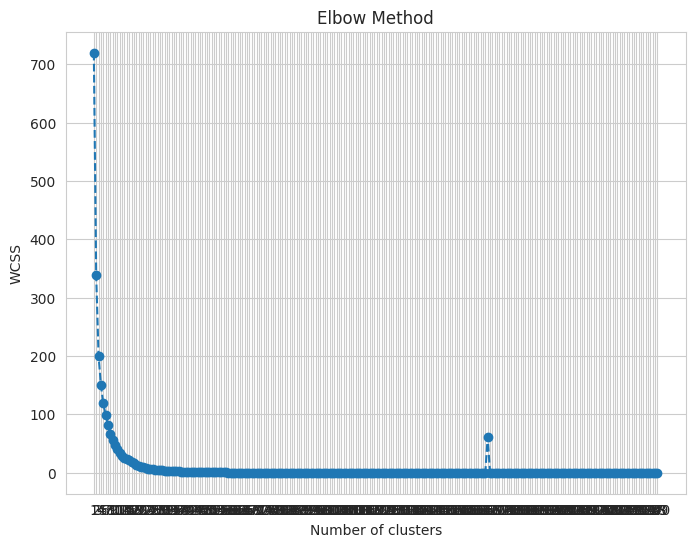

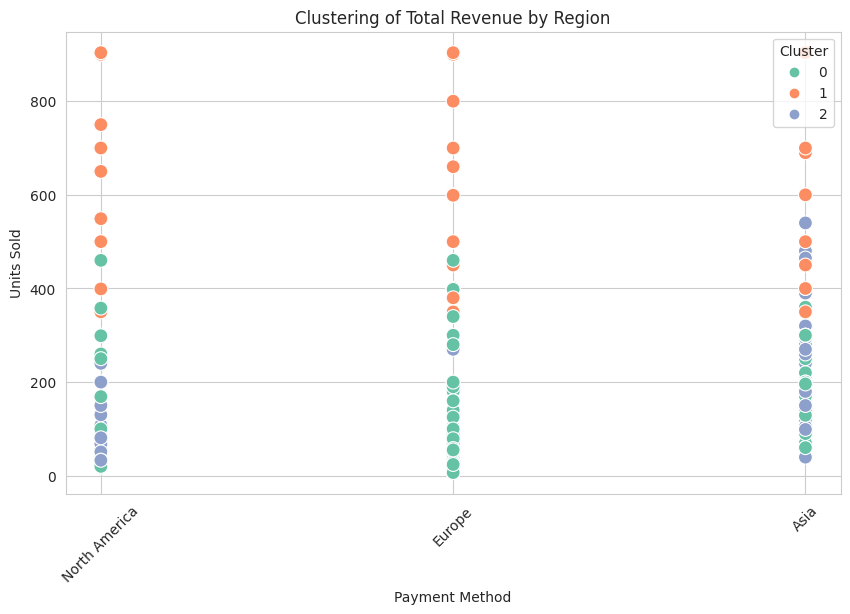

         Unit Price  Total Revenue  Units Sold
Cluster                                       
0        104.646000     143.650182    1.454545
1        464.033276     678.342845    1.482759
2         40.341111     147.186250    3.777778


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Specify n_init explicitly
kmeans = KMeans(n_clusters=5, n_init=10)  # You can set n_init to any value you prefer

# Select relevant features for clustering
features = ['Unit Price', 'Total Revenue', 'Units Sold']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(capped_sales[features])

# Determine the optimal number of clusters (e.g., using the Elbow method)
wcss = []
for i in range(1, len(capped_sales) + 1):  # Iterate up to the number of samples
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)  # Set n_init explicitly
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(capped_sales) + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, len(capped_sales) + 1))
plt.grid(True)
plt.show()

# Based on the Elbow method, choose the optimal number of clusters
n_clusters = 3  # Adjust this value based on your analysis

# Perform K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init=10)  # Set n_init explicitly
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original DataFrame
capped_sales['Cluster'] = clusters

# Scatter plot of clusters based on 'Payment Method'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=capped_sales, x='Region', y='Total Revenue', hue='Cluster', palette='Set2', s=100)
plt.title('Clustering of Total Revenue by Region')
plt.xlabel('Payment Method')
plt.ylabel('Units Sold')
plt.legend(title='Cluster')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Summary of clusters
cluster_summary = capped_sales.groupby('Cluster')[features].mean()
print(cluster_summary)
